In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [4]:
test["Survived"] = np.nan
submissionIds = pd.DataFrame(test["PassengerId"])

ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train,test)).reset_index(drop=True)

print("all_data siaze is:{}".format(all_data.shape))

all_data siaze is:(1309, 12)


In [5]:
#profile = ProfileReport(all_data, title="Titanic Data", explorative=True)

#profile.to_file("Titanic_Data_Profile.html")

In [6]:
all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
all_data.drop(['PassengerId'], axis=1, inplace=True)

In [8]:
all_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [9]:
all_data.drop(['Ticket'], axis=1, inplace=True)

all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [10]:
#pd.options.display.float_format = "{:,.2f}".format

#all_data.head()

In [11]:
all_data["Title"] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

all_data['Title'] = all_data['Title'].replace(['Sir', 'Countess', 'Lady', 'Col', 'Major', 'Dr', 'Jonkheer', 'Don', 
                                               'Dona', 'Rev', 'Capt'], 'Rare')
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

all_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [12]:
all_data.drop(['Name'], axis=1, inplace=True)

In [13]:
all_data["Cabin"] = all_data.Cabin.str.extract('(^([A-Z]))', expand = False)

all_data.Cabin[all_data.Cabin.isnull() == True] = 'Unk'

all_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,Unk,0.299854
7,T,0.000000


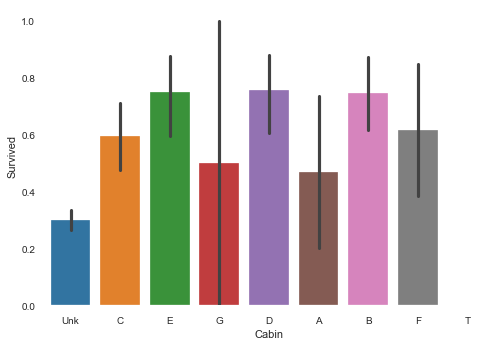

In [14]:
sns.barplot(all_data['Cabin'], all_data['Survived']);

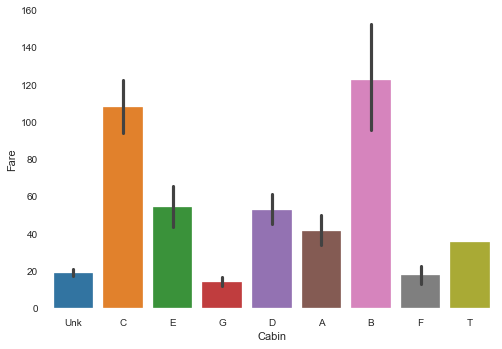

In [15]:
sns.barplot(all_data['Cabin'], all_data['Fare']);

In [16]:
all_data = pd.get_dummies(all_data, columns = ['Cabin'])
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unk
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,0,0,0,0,0,0,0,0,1
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,0,0,1,0,0,0,0,0,0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,0,0,0,0,0,0,0,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,0,0,1,0,0,0,0,0,0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,0,0,0,0,0,0,0,1


In [17]:
all_data['Fare'].fillna(all_data['Fare'].dropna().median(), inplace=True)

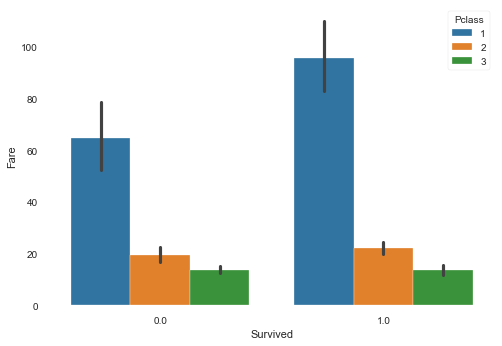

In [18]:
sns.barplot(all_data['Survived'], all_data['Fare'], all_data['Pclass']);

In [19]:
#all_data.drop(['Embarked'], axis=1, inplace=True)
all_data.Embarked[all_data.Embarked.isnull() == True] = 'S'

In [20]:
all_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


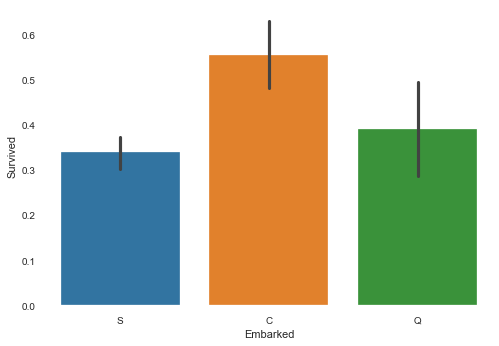

In [21]:
sns.barplot(all_data['Embarked'], all_data['Survived']);

&lt;matplotlib.legend.Legend at 0x7fcc5b824c70&gt;

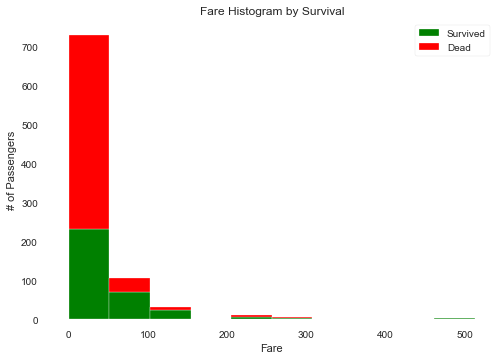

In [22]:
plt.hist(x = [all_data[all_data['Survived']==1]['Fare'],
        all_data[all_data['Survived']==0]['Fare']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.legend()

In [23]:
#all_data['FareBand'] = pd.cut(all_data['Fare'],30)
#all_data = MultiColumnLabelEncoder(columns=['FareBand']).fit_transform(all_data)
#all_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [24]:
#all_data.drop(['Fare'], axis=1, inplace=True)

In [25]:
all_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


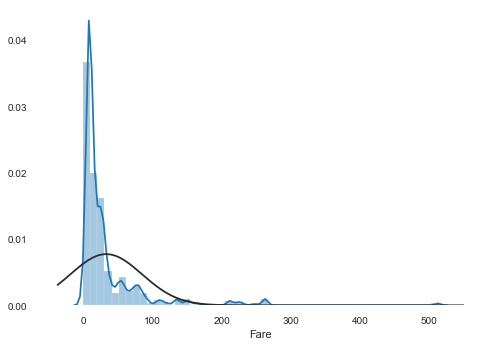

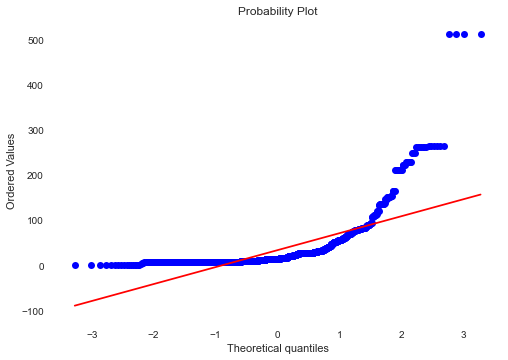

In [26]:
from scipy import stats
from scipy.stats import norm

#histogram and normal probability plot
sns.distplot(all_data['Fare'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['Fare'], plot=plt)

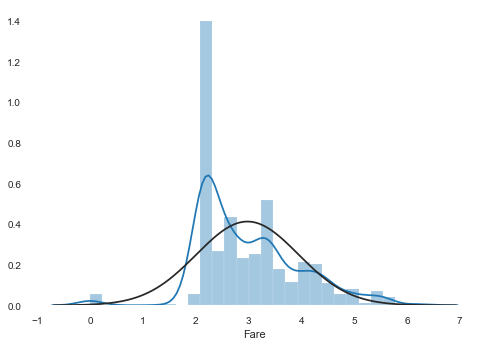

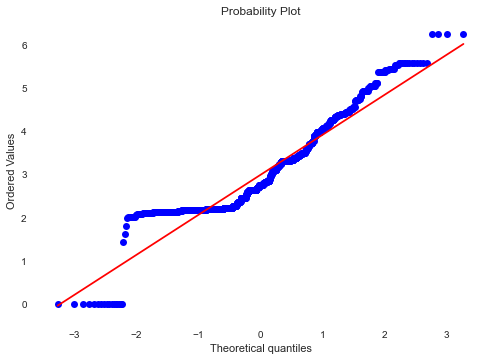

In [27]:
#applying log transformation
all_data['Fare'] = np.log1p(all_data['Fare'])

#histogram and normal probability plot
sns.distplot(all_data['Fare'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['Fare'], plot=plt)

In [28]:
all_data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unk
count,891.000000,1309.000000,1309,1046.000000,1309.000000,1309.000000,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Mr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,843,NaN,NaN,NaN,NaN,916,757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.294882,NaN,29.881138,0.498854,0.385027,2.979226,NaN,NaN,0.016807,0.049656,0.071811,0.035141,0.031322,0.016043,0.003820,0.000764,0.774637
std,0.486592,0.837836,NaN,14.413493,1.041658,0.865560,0.968321,NaN,NaN,0.128596,0.217317,0.258273,0.184207,0.174252,0.125688,0.061709,0.027639,0.417981
min,0.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,2.185579,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,2.737881,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,NaN,39.000000,1.000000,0.000000,3.474293,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [29]:
all_data = MultiColumnLabelEncoder(columns=['Sex']).fit_transform(all_data)
all_data = pd.get_dummies(all_data, columns = ['Pclass', 'Title', 'Embarked'])

all_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,2.110213,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,1.0,0,38.0,1,0,4.280593,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,1.0,0,26.0,0,0,2.188856,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1.0,0,35.0,1,0,3.990834,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,1,35.0,0,0,2.202765,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


&lt;matplotlib.legend.Legend at 0x7fcc6090dcd0&gt;

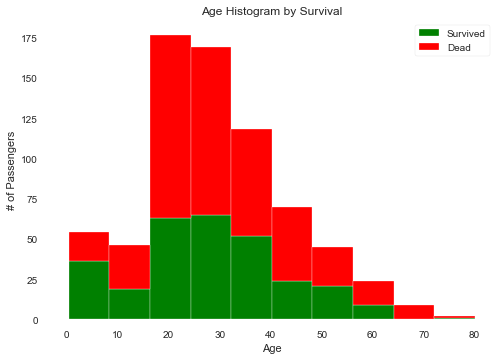

In [30]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fcc608e5c10&gt;

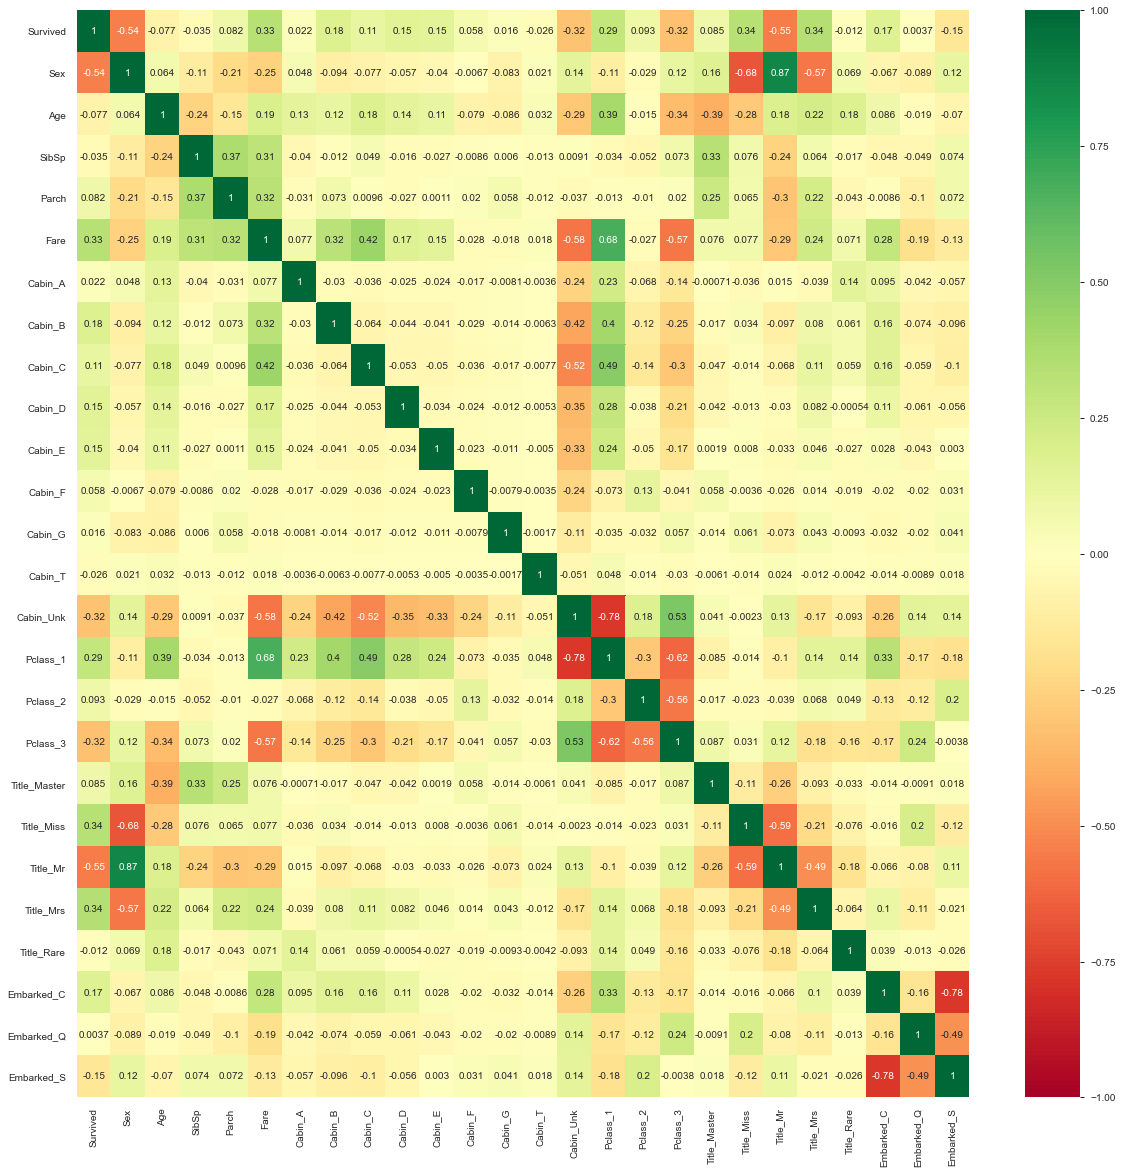

In [31]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [32]:
all_data_age = all_data.copy()

all_data_WithAge = all_data_age[pd.isnull(all_data_age['Age']) == False]
all_data_WithoutAge = all_data_age[pd.isnull(all_data_age['Age'])]

In [33]:
from sklearn.ensemble import RandomForestRegressor

use_Arguments = ['Pclass_1', 'Pclass_3','SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

rfModel_age = RandomForestRegressor(random_state=42)

rfModel_age.fit (all_data_WithAge[use_Arguments], all_data_WithAge['Age'])

age_Values = rfModel_age.predict(X = all_data_WithoutAge[use_Arguments])

print(age_Values)

[23.60827059 31.7519528  38.92347811 27.25699892 21.58328571 27.90144002
 42.03       27.77902155 23.99450343 27.90144002 29.74502185 36.66833333
 27.77902155 24.84953571 39.3595     33.48259081  6.38811667 27.90144002
 29.74502185 21.89264574 29.74502185 29.74502185 27.90144002 27.68974669
 17.82       29.74502185 36.21085595  3.88822778 30.975      30.97419495
 24.7002428  11.748      41.391      44.95788326  5.22787302 19.911
 31.748      49.38666667 32.405      36.21085595 27.77902155 17.15261905
 29.13437461 27.90144002  6.77077778 21.88       15.65166667 15.76
 30.97419495 58.705      36.21085595 27.77902155 44.02066667 27.77902155
 40.66269258 44.51521659 33.48259081 42.13361111 27.77902155 23.61492857
 26.23262474 29.74502185 29.50866667 17.15261905 18.33833333 39.18
 27.90144002 23.1165     58.60083333 27.25699892 21.58328571 21.58328571
 36.66833333 29.81922222 27.77902155 33.12       27.90144002 26.82214935
  6.77077778 27.90144002 24.18857143 40.66269258 29.97190107 27.9014

In [34]:
all_data_WithoutAge['Age'] = age_Values.astype(float)

all_data.update(all_data_WithoutAge['Age'])

all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   Age           1309 non-null   float64
 3   SibSp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   Fare          1309 non-null   float64
 6   Cabin_A       1309 non-null   uint8  
 7   Cabin_B       1309 non-null   uint8  
 8   Cabin_C       1309 non-null   uint8  
 9   Cabin_D       1309 non-null   uint8  
 10  Cabin_E       1309 non-null   uint8  
 11  Cabin_F       1309 non-null   uint8  
 12  Cabin_G       1309 non-null   uint8  
 13  Cabin_T       1309 non-null   uint8  
 14  Cabin_Unk     1309 non-null   uint8  
 15  Pclass_1      1309 non-null   uint8  
 16  Pclass_2      1309 non-null   uint8  
 17  Pclass_3      1309 non-null   uint8  
 18  Title_Master  

In [35]:
all_data.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,0.644003,29.838287,0.498854,0.385027,2.979226,0.016807,0.049656,0.071811,0.035141,...,0.211612,0.541635,0.046600,0.201681,0.578304,0.151261,0.022154,0.206264,0.093965,0.699771
std,0.486592,0.478997,13.583732,1.041658,0.865560,0.968321,0.128596,0.217317,0.258273,0.184207,...,0.408607,0.498454,0.210862,0.401408,0.494019,0.358440,0.147242,0.404777,0.291891,0.458533
min,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.583286,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,28.000000,0.000000,0.000000,2.737881,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,37.000000,1.000000,0.000000,3.474293,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,9.000000,6.240917,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


&lt;matplotlib.legend.Legend at 0x7fcc6253ca00&gt;

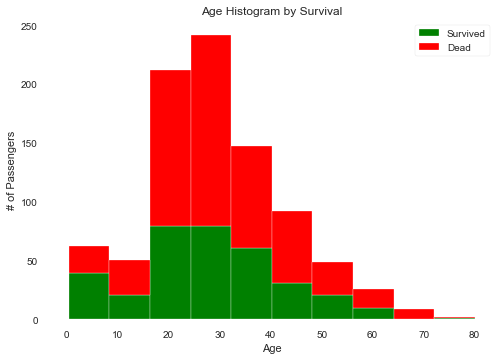

In [36]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

In [37]:
all_data['AgeBand'] = pd.cut(all_data['Age'], 8)

all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 10.149]",0.569444
1,"(10.149, 20.128]",0.387597
2,"(20.128, 30.106]",0.343849
3,"(30.106, 40.085]",0.405128
4,"(40.085, 50.064]",0.360360
5,"(50.064, 60.043]",0.400000
6,"(60.043, 70.021]",0.235294
7,"(70.021, 80.0]",0.200000


In [38]:
all_data['IsChild'] = np.where(all_data['Age'] < 18, 1, 0)

all_data[['IsChild', 'Survived']].groupby(['IsChild'], as_index=False).mean().sort_values(by='IsChild', ascending=True)

,IsChild,Survived
0,0,0.360892
1,1,0.519380


In [39]:
all_data['IsElderly'] = np.where(all_data['Age'] >= 60, 1, 0)

all_data[['IsElderly', 'Survived']].groupby(['IsElderly'], as_index=False).mean().sort_values(by='IsElderly', ascending=True)

,IsElderly,Survived
0,0,0.387283
1,1,0.269231


In [40]:
all_data = MultiColumnLabelEncoder(columns=['AgeBand']).fit_transform(all_data)
all_data.drop(['Age'], axis=1, inplace=True)

all_data.head()


,Survived,Sex,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,AgeBand,IsChild,IsElderly
0,0.0,1,1,0,2.110213,0,0,0,0,0,...,0,1,0,0,0,0,1,2,0,0
1,1.0,0,1,0,4.280593,0,0,1,0,0,...,0,0,1,0,1,0,0,3,0,0
2,1.0,0,0,0,2.188856,0,0,0,0,0,...,1,0,0,0,0,0,1,2,0,0
3,1.0,0,1,0,3.990834,0,0,1,0,0,...,0,0,1,0,0,0,1,3,0,0
4,0.0,1,0,0,2.202765,0,0,0,0,0,...,0,1,0,0,0,0,1,3,0,0


In [41]:
all_data["FamilySize"] = all_data["SibSp"] + all_data["Parch"]+1
all_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

&lt;matplotlib.legend.Legend at 0x7fcc6262fb50&gt;

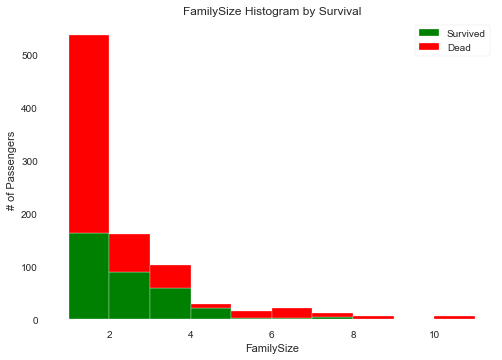

In [42]:
plt.hist(x = [all_data[all_data['Survived']==1]['FamilySize'],
        all_data[all_data['Survived']==0]['FamilySize']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize')
plt.ylabel('# of Passengers')
plt.legend()

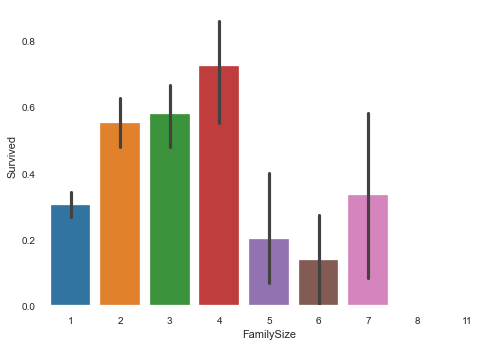

In [43]:
sns.barplot(all_data['FamilySize'], all_data['Survived']);

In [44]:
all_data['IsAlone'] = np.where(all_data['FamilySize'] == 1, 1, 0)

all_data['SmallFamily']   = all_data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)

all_data['LargeFamily'] = np.where(all_data['FamilySize'] > 4, 1, 0)


In [45]:
all_data['FamilyBand'] = pd.cut(all_data['FamilySize'], 11)

all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

,FamilyBand,Survived
0,"(0.99, 1.909]",0.303538
1,"(1.909, 2.818]",0.552795
2,"(2.818, 3.727]",0.578431
3,"(3.727, 4.636]",0.724138
4,"(4.636, 5.545]",0.200000
5,"(5.545, 6.455]",0.136364
6,"(6.455, 7.364]",0.333333
7,"(7.364, 8.273]",0.000000
8,"(8.273, 9.182]",NaN
9,"(9.182, 10.091]",NaN


In [46]:
all_data = MultiColumnLabelEncoder(columns=['FamilyBand']).fit_transform(all_data)

all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

,FamilyBand,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,8,0.000000


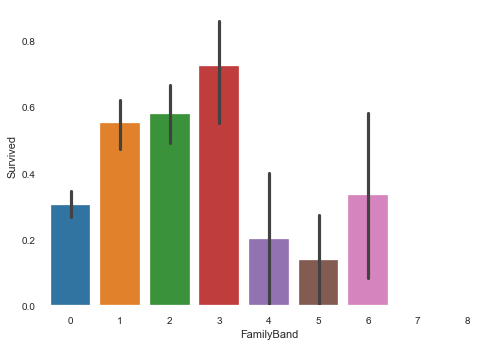

In [47]:
sns.barplot(all_data['FamilyBand'], all_data['Survived']);

In [48]:
#all_data = pd.get_dummies(all_data, columns = ['FamilyBand'])

In [49]:
all_data.drop(['FamilySize'], axis=1, inplace=True)

all_data.head()

,Survived,Sex,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Embarked_C,Embarked_Q,Embarked_S,AgeBand,IsChild,IsElderly,IsAlone,SmallFamily,LargeFamily,FamilyBand
0,0.0,1,2.110213,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,1,0,1
1,1.0,0,4.280593,0,0,1,0,0,0,0,...,1,0,0,3,0,0,0,1,0,1
2,1.0,0,2.188856,0,0,0,0,0,0,0,...,0,0,1,2,0,0,1,0,0,0
3,1.0,0,3.990834,0,0,1,0,0,0,0,...,0,0,1,3,0,0,0,1,0,1
4,0.0,1,2.202765,0,0,0,0,0,0,0,...,0,0,1,3,0,0,1,0,0,0


In [50]:
all_data.describe()

,Survived,Sex,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Embarked_C,Embarked_Q,Embarked_S,AgeBand,IsChild,IsElderly,IsAlone,SmallFamily,LargeFamily,FamilyBand
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,0.644003,2.979226,0.016807,0.049656,0.071811,0.035141,0.031322,0.016043,0.003820,...,0.206264,0.093965,0.699771,2.433155,0.134454,0.030558,0.603514,0.333843,0.062643,0.867074
std,0.486592,0.478997,0.968321,0.128596,0.217317,0.258273,0.184207,0.174252,0.125688,0.061709,...,0.404777,0.291891,0.458533,1.367882,0.341270,0.172182,0.489354,0.471765,0.242413,1.494861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.737881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,3.474293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [51]:
#all_data['Pclass*Fare'] = all_data['Pclass'] * all_data['FareBand']
#all_data['Pclass*Age'] = all_data['Pclass'] * all_data['AgeBand']
#all_data['Title*Fare'] = all_data['Title'] * all_data['FareBand']
#all_data['Title*Age'] = all_data['Title'] * all_data['AgeBand']
#all_data['Title*Class'] = all_data['Title'] * all_data['Pclass']
#all_data['Embarked*Fare'] = all_data['Embarked'] * all_data['FareBand']
#all_data['Embarked*Class'] = all_data['Embarked'] * all_data['Pclass']
#all_data['Embarked*Age'] = all_data['Embarked'] * all_data['AgeBand']
#all_data['Embarked*Title'] = all_data['Embarked'] * all_data['Title']

#all_data = pd.get_dummies(all_data, columns = ['Title', 'Embarked', 'Pclass'])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fcc60592250&gt;

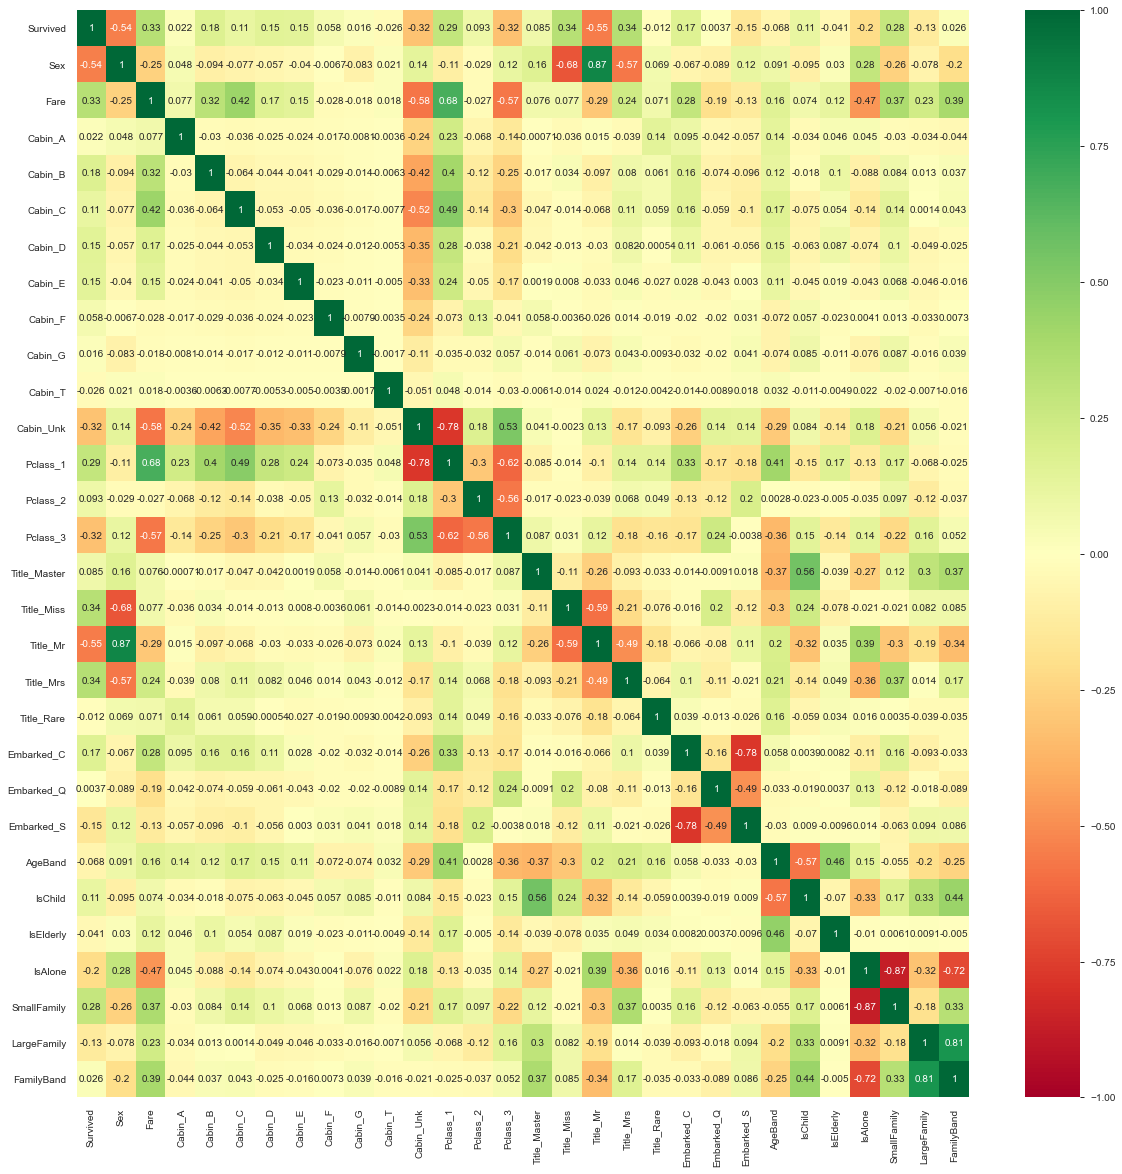

In [52]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [53]:
all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   Fare          1309 non-null   float64
 3   Cabin_A       1309 non-null   uint8  
 4   Cabin_B       1309 non-null   uint8  
 5   Cabin_C       1309 non-null   uint8  
 6   Cabin_D       1309 non-null   uint8  
 7   Cabin_E       1309 non-null   uint8  
 8   Cabin_F       1309 non-null   uint8  
 9   Cabin_G       1309 non-null   uint8  
 10  Cabin_T       1309 non-null   uint8  
 11  Cabin_Unk     1309 non-null   uint8  
 12  Pclass_1      1309 non-null   uint8  
 13  Pclass_2      1309 non-null   uint8  
 14  Pclass_3      1309 non-null   uint8  
 15  Title_Master  1309 non-null   uint8  
 16  Title_Miss    1309 non-null   uint8  
 17  Title_Mr      1309 non-null   uint8  
 18  Title_Mrs     

In [54]:
train = all_data[:ntrain]
test = all_data[ntrain:]

test.drop(['Survived'], axis=1, inplace=True)

In [55]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import accuracy_score

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Scale data
#scaler = StandardScaler().fit(test)
#scaler = MinMaxScaler().fit(test)
#scaled_test = scaler.transform(test)

#imputed_test = pd.DataFrame(scaled_test)
#imputed_test.columns = test.columns


#Scale data
#scaler = StandardScaler().fit(train)
#scaler = MinMaxScaler().fit(train)
#scaled_train = scaler.transform(train)

#imputed_train = pd.DataFrame(scaled_train)
#imputed_train.columns = train.columns

y = train.Survived

#imputed_train.drop(['Survived'], axis=1, inplace=True)

X = train.drop(['Survived'], 1)

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

           Specs       Score
16      Title_Mr  112.805785
0            Sex   92.702447
17     Title_Mrs   89.474177
15    Title_Miss   79.531749
11      Pclass_1   55.175151
26   SmallFamily   46.912822
13      Pclass_3   41.553071
1           Fare   30.699030
3        Cabin_B   25.875581
10     Cabin_Unk   20.488314
19    Embarked_C   20.464401
5        Cabin_D   19.489646
6        Cabin_E   18.140638
25       IsAlone   14.640793
27   LargeFamily   12.983634
4        Cabin_C   10.936730
23       IsChild   10.020537
14  Title_Master    6.180425
12      Pclass_2    6.160767
21    Embarked_S    5.489205


In [58]:
#use_features = ['Title_Mr', 'Sex', 'Title_Mrs', 'Title_Miss', 'SmallFamily', 'Pclass_1', 'Pclass_3', 'Cabin_B',
#                'Cabin_Unk', 'Embarked_C', 'Cabin_D', 'Cabin_E', 'IsAlone', 'LargeFamily', 'LargeFamily', 'Cabin_C', 'IsChild']
#X = X[use_features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size = 0.3)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fcc43f516a0&gt;

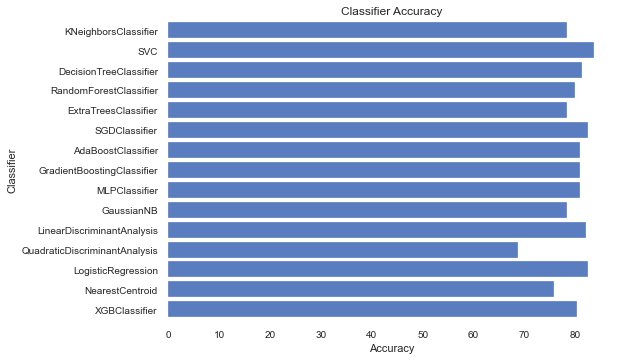

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='auto'),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    SGDClassifier(random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(max_iter = 1000, random_state= 42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=42),
    NearestCentroid(),
    XGBClassifier(objective="binary:logistic", random_state=42)
    ]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}


for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(train_X, train_y)
    train_predictions = clf.predict(val_X)
    acc = accuracy_score(val_y, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] * 100.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [60]:
log.groupby(['Classifier'], as_index=False).mean().sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
13,SVC,83.582090
7,LogisticRegression,82.462687
12,SGDClassifier,82.462687
6,LinearDiscriminantAnalysis,82.089552
1,DecisionTreeClassifier,81.343284
0,AdaBoostClassifier,80.970149
4,GradientBoostingClassifier,80.970149
8,MLPClassifier,80.970149
14,XGBClassifier,80.223881
11,RandomForestClassifier,79.850746


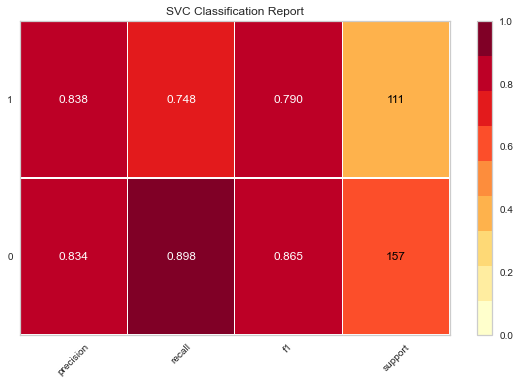

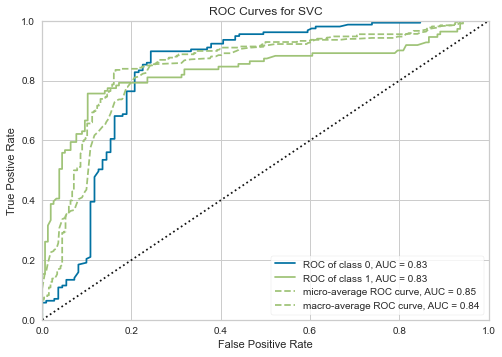

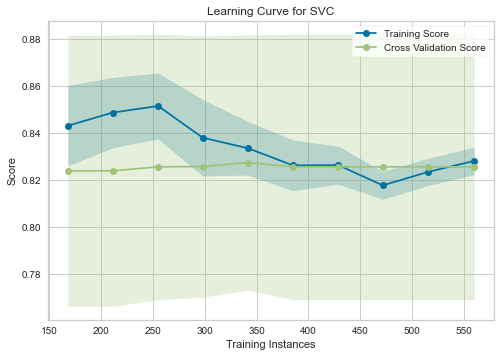

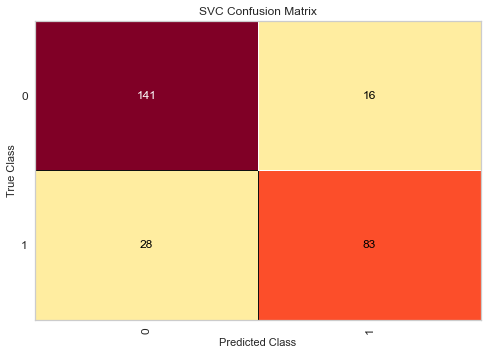

&lt;Figure size 576x396 with 0 Axes&gt;

In [61]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import confusion_matrix

classes = ["0", "1"]

# Instantiate the classification model and visualizer
model = SVC(probability=True, gamma='auto')

visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(train_X, train_y)        # Fit the visualizer and the model
visualizer.score(val_X, val_y)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#ROCAUC
#roc_auc(model, train_X, train_y, X_test=val_X, y_test=val_y, classes=classes)
roc_auc(model, train_X, train_y, val_X, val_y, classes=classes)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate visualizer
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Instantiate confusion matrix
confusion_matrix(
    model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

In [62]:
pred = visualizer.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.87       169
         1.0       0.75      0.84      0.79        99

    accuracy                           0.84       268
   macro avg       0.82      0.84      0.83       268
weighted avg       0.84      0.84      0.84       268



In [63]:
#from yellowbrick.model_selection import RFECV

#Instantiate RFECV visualizer
#visualizer = RFECV(model)

#visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
#visualizer.show()           # Finalize and render the figure

In [64]:
#final_model=visualizer.rfe_estimator_
final_model=model

In [65]:
# Instantiate visualizer
#visualizer = LearningCurve(
#    final_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
#)

#visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
#visualizer.show()           # Finalize and render the figure

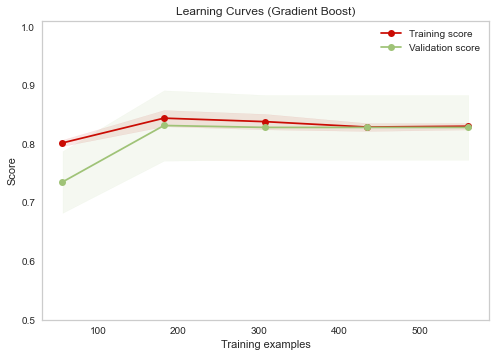

In [66]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Gradient Boost)"
cv = 10
plot_learning_curve(final_model, title, train_X, train_y, ylim=(0.5, 1.01), cv=cv, n_jobs=1);


In [67]:
#pred = final_model.predict(val_X)
#print(classification_report(pred, val_y))

In [68]:
# Instantiate confusion matrix
#confusion_matrix(
#    final_model,
#    train_X, train_y, val_X, val_y,
#    classes=classes
#)
#plt.tight_layout()

In [69]:
pred = final_model.predict(test)

submission = pd.DataFrame({'PassengerId':submissionIds['PassengerId'], 'Survived':pred})

submission['PassengerId'] = submission['PassengerId'].astype('int')
submission['Survived'] = submission['Survived'].astype('int')

filename = 'Titanic Prediction.csv'

submission.to_csv(filename, index=False)

In [70]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_model, random_state=42).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0351 ± 0.0101,FamilyBand
0.0321 ± 0.0101,Title_Mr
0.0164 ± 0.0076,Sex
0.0037 ± 0.0047,Title_Mrs
0.0030 ± 0.0056,Fare
0.0030 ± 0.0030,AgeBand
0 ± 0.0000,IsAlone
0 ± 0.0000,Cabin_A
0 ± 0.0000,Cabin_B
0 ± 0.0000,Cabin_C


In [71]:
import shap

# load JS visualization code to notebook
#shap.initjs()

# explain the model's predictions using SHAP
#explainer = shap.TreeExplainer(final_model)
#shap_values = explainer.shap_values(val_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.force_plot(explainer.expected_value, shap_values[4,:], val_X.iloc[4,:])

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

In [73]:
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
model.add(Dropout(0.50))
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [74]:
model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)        

In [75]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, batch_size=32, epochs=300)

==========] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8250
Epoch 107/300
20/20 [==============================] - 0s 904us/step - loss: 0.4260 - accuracy: 0.8443
Epoch 108/300
20/20 [==============================] - 0s 885us/step - loss: 0.4343 - accuracy: 0.8331
Epoch 109/300
20/20 [==============================] - 0s 837us/step - loss: 0.4388 - accuracy: 0.8379
Epoch 110/300
20/20 [==============================] - 0s 971us/step - loss: 0.4270 - accuracy: 0.8299
Epoch 111/300
20/20 [==============================] - 0s 856us/step - loss: 0.4520 - accuracy: 0.8347
Epoch 112/300
20/20 [==============================] - 0s 856us/step - loss: 0.4368 - accuracy: 0.8427
Epoch 113/300
20/20 [==============================] - 0s 899us/step - loss: 0.4473 - accuracy: 0.8299
Epoch 114/300
20/20 [==============================] - 0s 830us/step - loss: 0.4458 - accuracy: 0.8395
Epoch 115/300
20/20 [==============================] - 0s 735us/step - loss: 0.4372 - accuracy: 0.8395
Epoch 116/300

&lt;tensorflow.python.keras.callbacks.History at 0x7fcc4e7b2280&gt;

In [76]:
pred = model.predict_classes(val_X)
print(metrics.accuracy_score(val_y, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) &gt; 0.5).astype(&quot;int32&quot;)`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.7985074626865671


In [77]:
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       181
           1       0.65      0.83      0.73        87

    accuracy                           0.80       268
   macro avg       0.78      0.81      0.78       268
weighted avg       0.82      0.80      0.80       268



In [78]:
history=model.fit(train_X, train_y, validation_split=0.25, epochs=300, batch_size=32, verbose=0)

print(history.history.keys())

dict_keys([&#39;loss&#39;, &#39;accuracy&#39;, &#39;val_loss&#39;, &#39;val_accuracy&#39;])


&lt;function matplotlib.pyplot.show(*args, **kw)&gt;

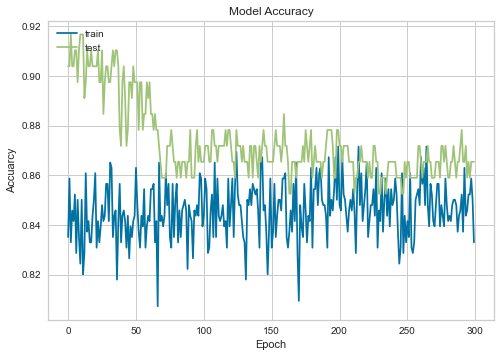

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

&lt;function matplotlib.pyplot.show(*args, **kw)&gt;

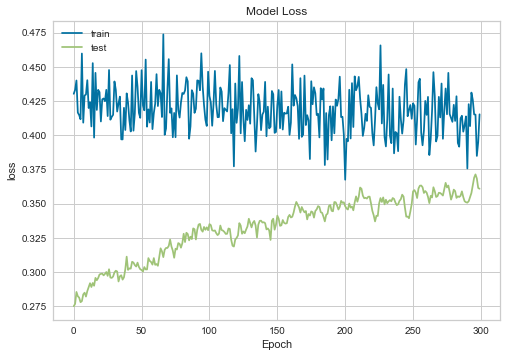

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [81]:
pred = model.predict_classes(test)

submission['PassengerId'] = submissionIds['PassengerId'].astype('int')
submission['Survived'] = pred.astype('int')

filename = 'Titanic Prediction TF.csv'

submission.to_csv(filename, index=False)